In [1]:
import snappy
from snappy import ProductIO
import datetime
import sys
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from netCDF4 import Dataset
from scipy import signal
import cv2
import calibrate
import direction
%matplotlib inline

In [150]:
label = pd.read_csv('./sar_ndbc_ecmwf_dataset_subset_2000.csv')
dataset = Dataset('/Volumes/Yangchao/subset_2000/subset_'+label.sar[0]+'.dim')

In [151]:
sigma_vv = dataset.variables['Sigma0_VV'][:]
sigma_vh = dataset.variables['Sigma0_VH'][:]

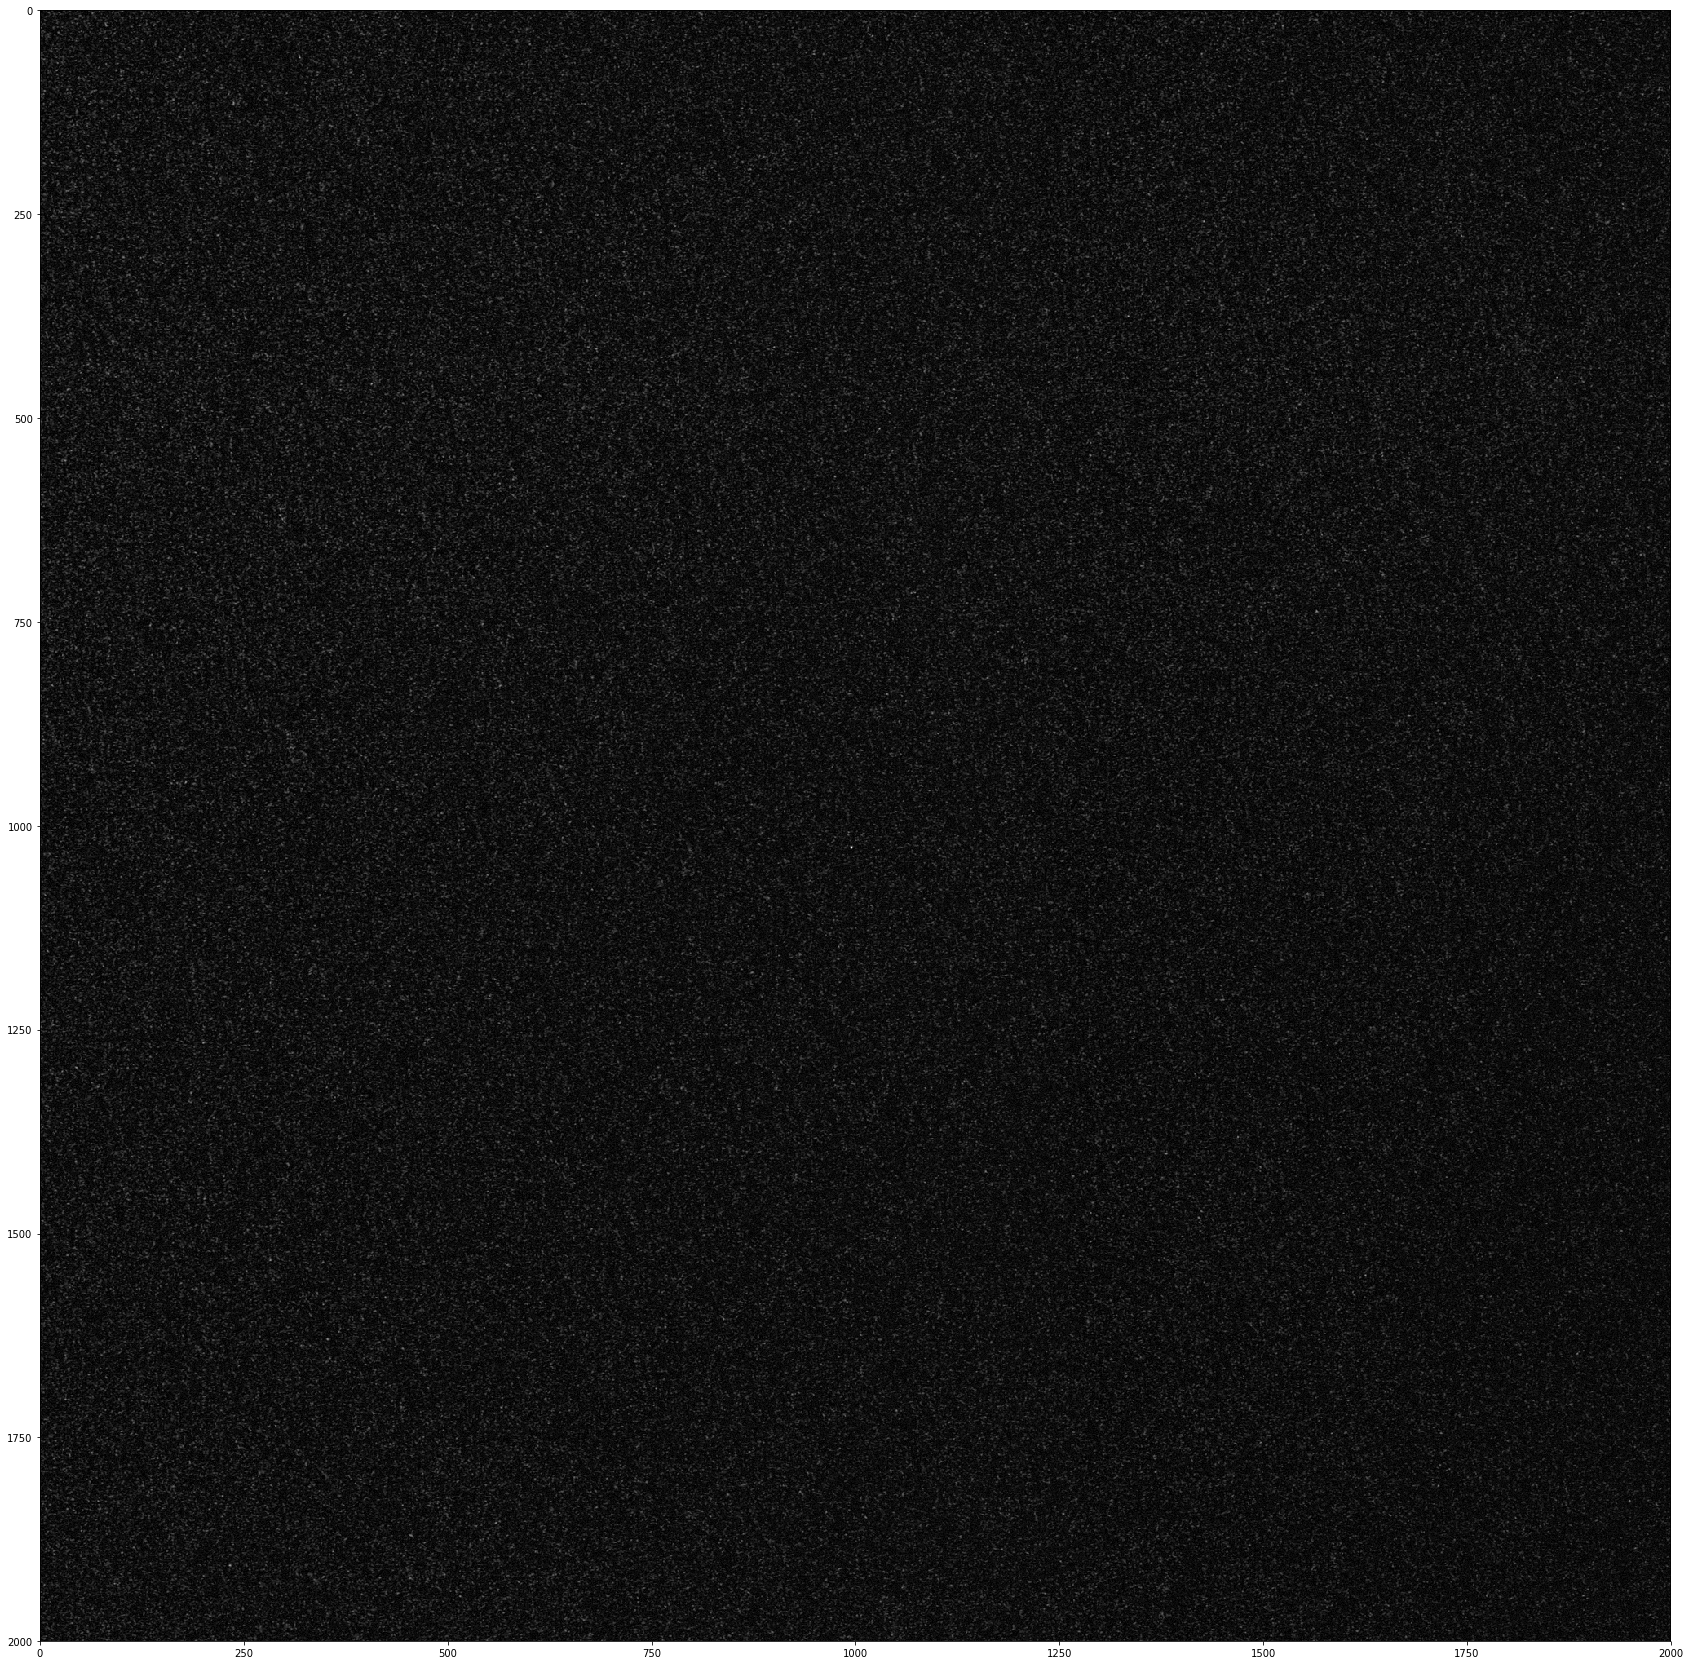

In [161]:
plt.figure(figsize=(30, 30))
plt.imshow(sigma_vh, 'gray')

In [153]:
x = sigma_vh[:400, 400:800]

In [154]:
xf = np.abs(np.fft.fftshift(np.fft.fft2(x)))

In [155]:
xf[190:210, 190:210]=0

(-0.5, 399.5, 399.5, -0.5)

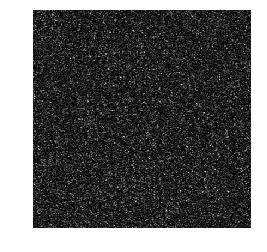

In [156]:
plt.imshow(x, 'gray')
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

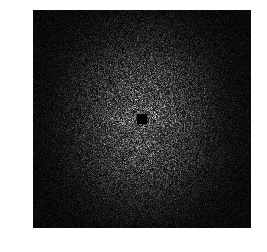

In [157]:
plt.imshow(xf, 'gray')
plt.axis('off')

In [158]:
def H(img):
    s = np.sum(img)
    p = img/s
    return -np.sum(p[p!=0]*np.log(p[p!=0]))

In [159]:
H(xf)

11.65338654184293

In [160]:
H(xf)

11.65338654184293

In [37]:
H(xf)

11.330990478595155

In [83]:
xf.max()

190.2991715082696

In [92]:
x = np.zeros((100, 100))

In [93]:
x[:] = np.sin(2*np.linspace(-1, 1, 100))

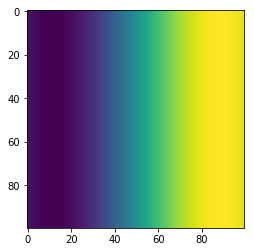

In [94]:
plt.imshow(x)

In [95]:
xf = np.abs(np.fft.fftshift(np.fft.fft2(x)))

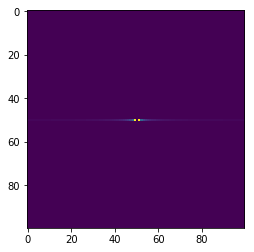

In [96]:
plt.imshow(xf)

In [139]:
np.argmax(xf)

74972

In [141]:
74972%400

172